In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

task_conditions = [
    {"source": "CWRU_0", "target": "CWRU_1", "name": "T1(1730->1750)"},
    {"source": "CWRU_0", "target": "CWRU_2", "name": "T2(1730->1772)"},
    {"source": "CWRU_1", "target": "CWRU_0", "name": "T3(1750->1730)"},
    {"source": "CWRU_1", "target": "CWRU_2", "name": "T4(1750->1772)"},
    {"source": "CWRU_2", "target": "CWRU_0", "name": "T5(1772->1730)"},
    {"source": "CWRU_2", "target": "CWRU_1", "name": "T6(1772->1750)"},
    {"source": "JNU_0", "target": "JNU_1", "name": "T1(600>800)"},
    {"source": "JNU_0", "target": "JNU_2", "name": "T2(600->1000)"},
    {"source": "JNU_1", "target": "JNU_0", "name": "T3(800->600)"},
    {"source": "JNU_1", "target": "JNU_2", "name": "T4(800->1000)"},
    {"source": "JNU_2", "target": "JNU_0", "name": "T5(1000->600)"},
    {"source": "JNU_2", "target": "JNU_1", "name": "T6(1000->800)"}

]


def plot_radar_chart(data, title, fig=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))
        
        
    for condition in task_conditions:
        data.loc[  (data["source"] == condition["source"]) & 
                (data["target"] == condition["target"]), "Task"] = condition["name"]
        
    data['Task_Order'] = data['Task'].str.extract('(\d+)').astype(int)
    

    # Task_Order를 기준으로 정렬
    data = data.sort_values(['Task_Order', 'Task']).drop(columns=['Task_Order'])

    # Name 목록 추출
    names = data['Name'].unique()
    
    # Task 목록 추출
    tasks = data['Task'].unique()
    
    # 모델별 평균 성능 계산
    model_means = data.groupby('Name')[['Task', 'last_target_acc']].apply(lambda x: x.set_index('Task').expanding().mean().reset_index())
    model_means = model_means.groupby('Name').last().reset_index()
    model_means['Task'] = 'Average'
    
    # 데이터에 모델별 평균 성능 추가
    data = pd.concat([data, model_means], ignore_index=True)
    
    # 업데이트된 Task 목록 추출
    tasks = np.append(tasks, 'Average')
    
    # 레이더 차트 그리기
    angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False).tolist()
    angles += angles[:1]  # 마지막 각도 추가하여 폐쇄형 다각형 만들기
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # 다각형 내부 그리드 그리기
    for i in range(1, 6):  # 5개 레벨의 그리드를 그립니다. 레벨 수는 필요에 따라 조정할 수 있습니다.
        ax.plot(angles, [i * 0.2] * len(angles), '-', color="gray", lw=0.5)  # 다각형 그리드
    
    
    
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=tasks, fontsize=14)
    
    for name in names:
        name_data = data[data['Name'] == name]
        values = [name_data[name_data['Task'] == task]['last_target_acc'].values[0] if len(name_data[name_data['Task'] == task]) > 0 else 0 for task in tasks]
        values += values[:1]  # 첫 번째 값을 마지막에 추가하여 폐쇄형 다각형 데이터 포인트 만들기
        
        
        ax.plot(angles, values, linewidth=3, linestyle='solid', label=name, marker='o', markersize=5)  # 마커 추가
        #ax.fill(angles, values, alpha=0.1)
    
    ax.set_ylim(0, 1.0)  # 적절한 최대값으로 설정
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    
    ax.grid(False)
    ax.set_title(title, size=20)
    
    return fig, ax



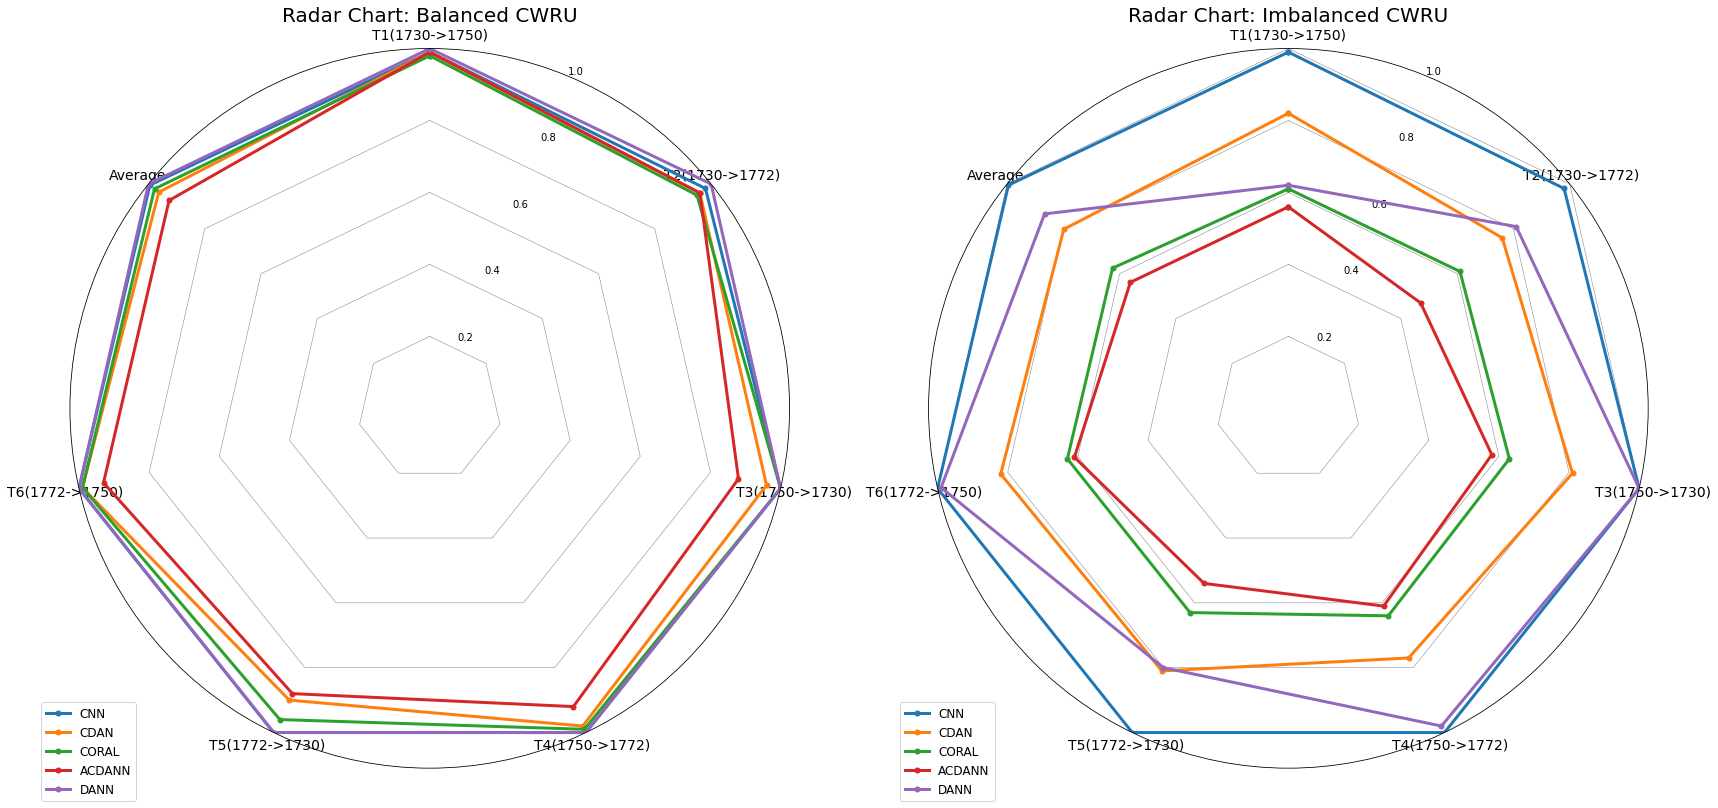

In [38]:
# 데이터프레임 로딩 및 준비
df1 = pd.read_csv('balanced_cwru.csv')
df2 = pd.read_csv('imbalanced_cwru.csv')

# 레이더 차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(24, 12), subplot_kw=dict(polar=True))
plot_radar_chart(df1, 'Radar Chart: Balanced CWRU', fig, axs[0])
plot_radar_chart(df2, 'Radar Chart: Imbalanced CWRU', fig, axs[1])
plt.tight_layout()
plt.show()

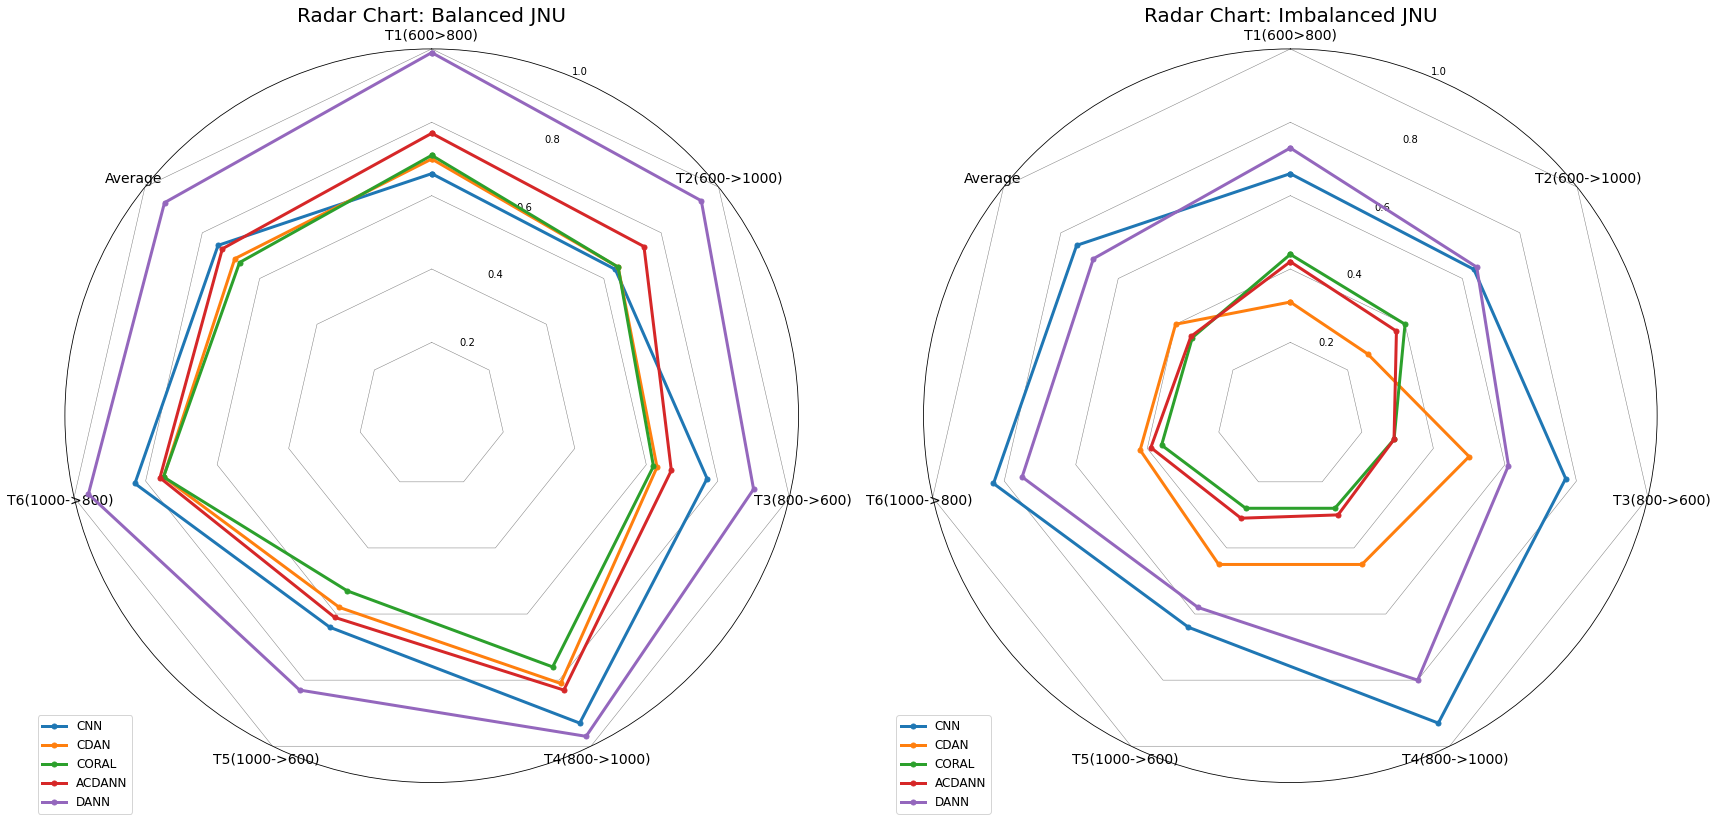

In [39]:
df1 = pd.read_csv('balanced_jnu.csv')
df2 = pd.read_csv('imbalanced_jnu.csv')

# 레이더 차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(24, 12), subplot_kw=dict(polar=True))
plot_radar_chart(df1, 'Radar Chart: Balanced JNU', fig, axs[0])
plot_radar_chart(df2, 'Radar Chart: Imbalanced JNU', fig, axs[1])
plt.tight_layout()
plt.show()